In [ ]:
#web scrape
import requests
from bs4 import BeautifulSoup



def get_video_links(archive_url):

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links, number):
	directory_path = f"./audio/{number}/"

	for link in video_links:
		file_name = f"{directory_path}{link.split('/')[-1]}"

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return

for i in range(10):
	archive_url = f"https://clarksonmsda.org/ml/audio2/data/numbers/{i}/"

	video_links = get_video_links(archive_url)

	download_video_series(video_links, i)
	

	

  

In [25]:
import IPython.display as ipd
ipd.Audio('audio/1/american_f_Alexa_20230406110150.wav')

In [36]:

for i in range(10):
    file_path = f"./audio/{i}/.DS_Store"

    # Check if the file exists
    if os.path.exists(file_path):
        # Remove the file
        os.remove(file_path)
        print(f"File {file_path} removed successfully")
    else:
        print(f"File {file_path} not found")


File ./audio/0/.DS_Store removed successfully
File ./audio/1/.DS_Store removed successfully
File ./audio/2/.DS_Store removed successfully
File ./audio/3/.DS_Store removed successfully
File ./audio/4/.DS_Store removed successfully
File ./audio/5/.DS_Store removed successfully
File ./audio/6/.DS_Store removed successfully
File ./audio/7/.DS_Store removed successfully
File ./audio/8/.DS_Store removed successfully
File ./audio/9/.DS_Store removed successfully


In [1]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os


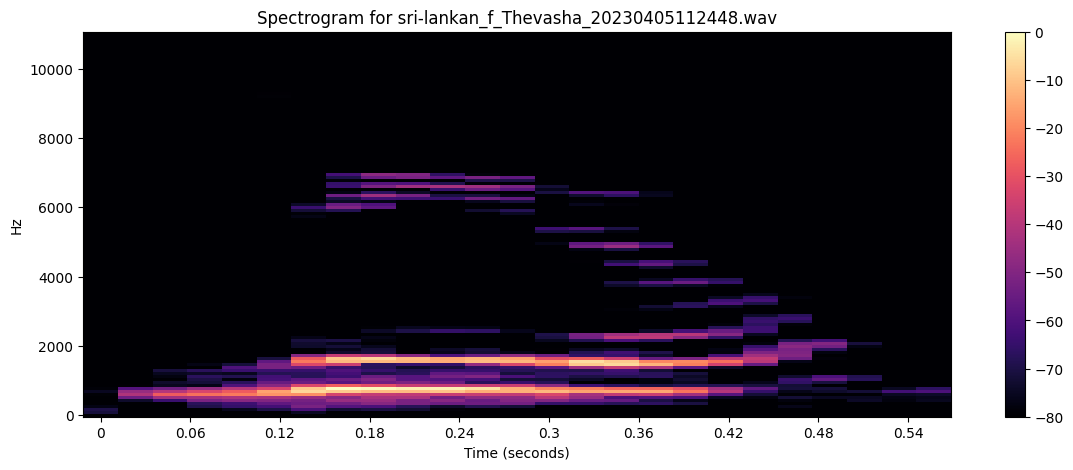

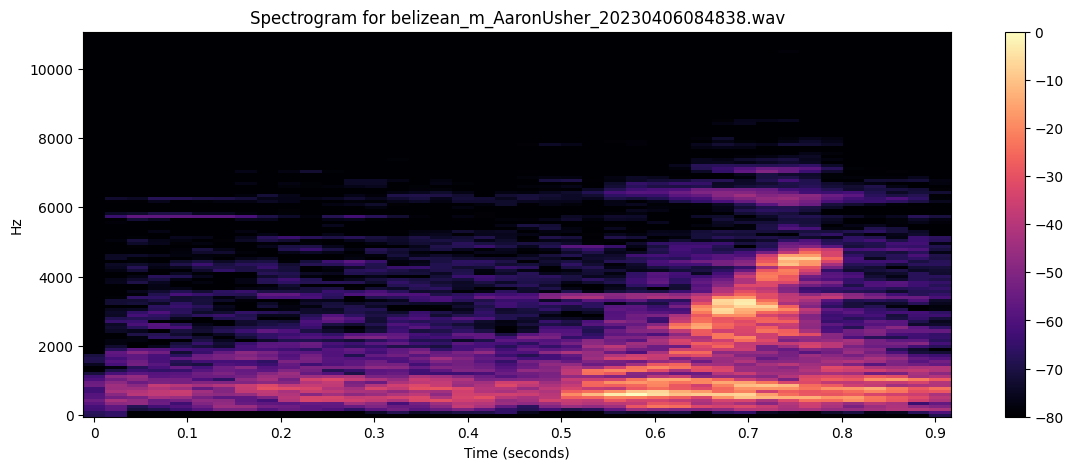

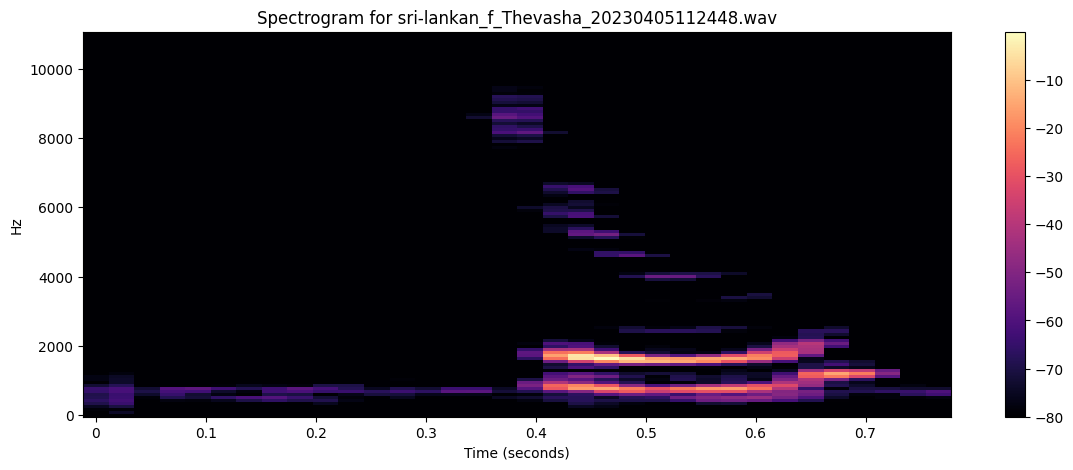

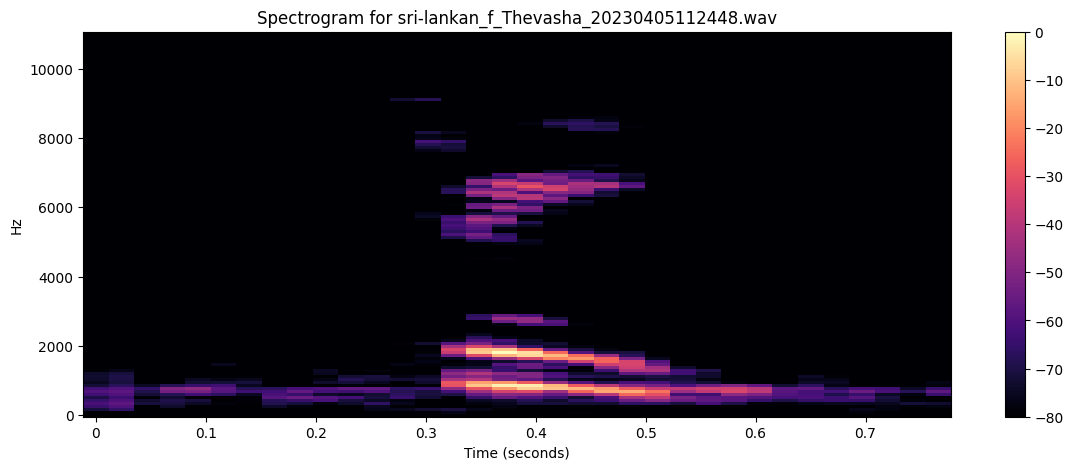

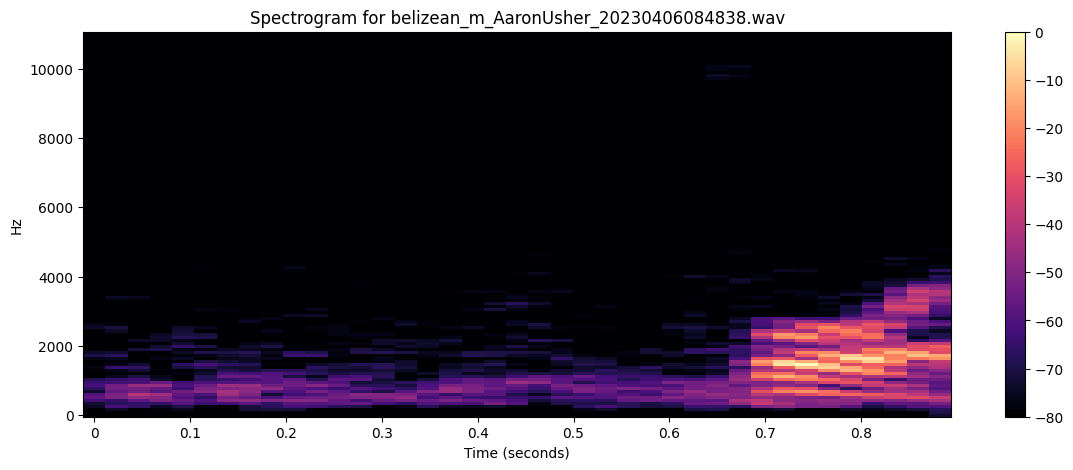

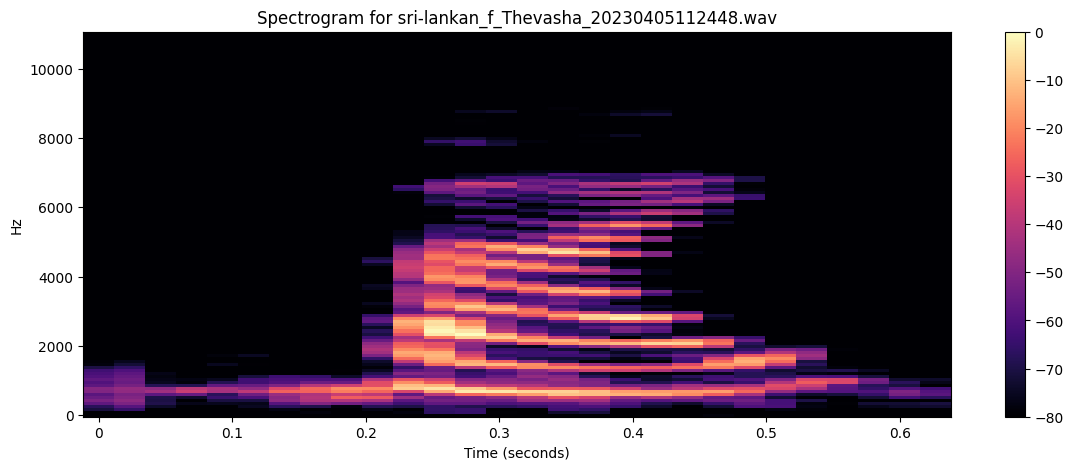

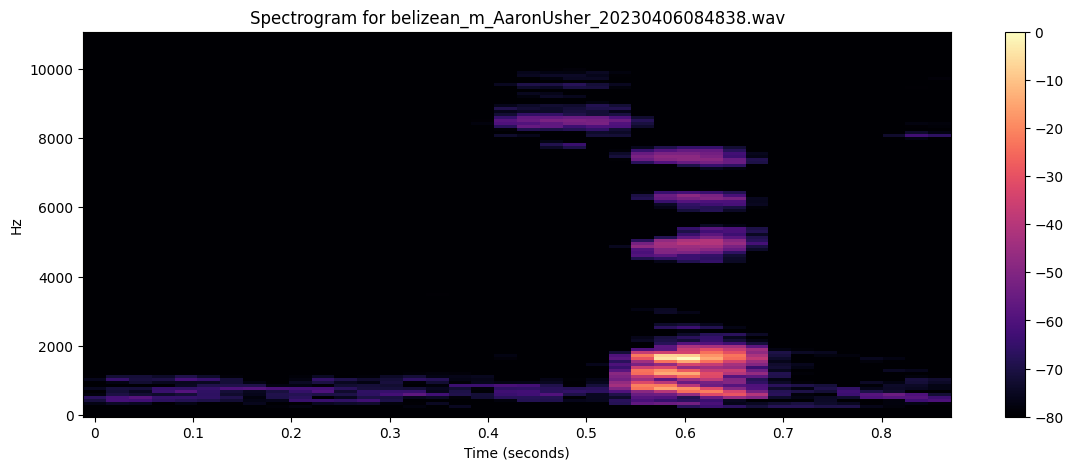

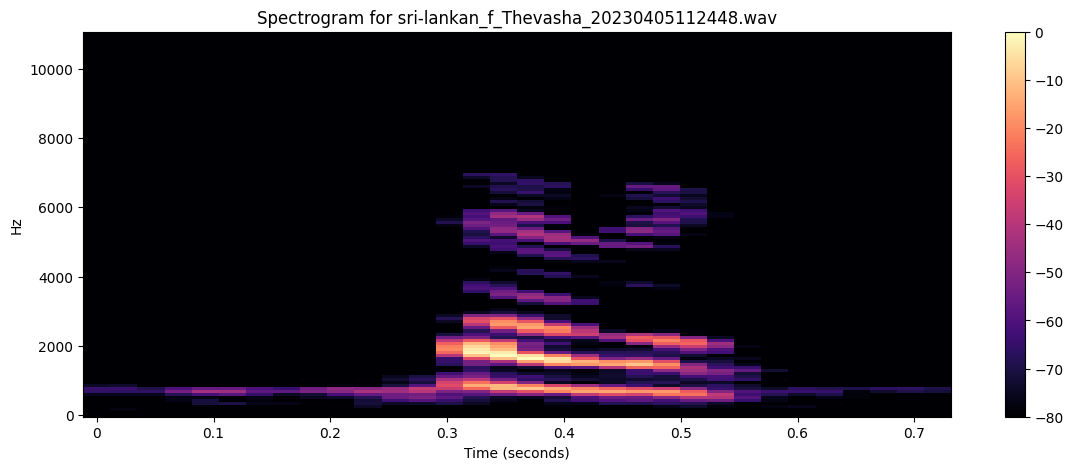

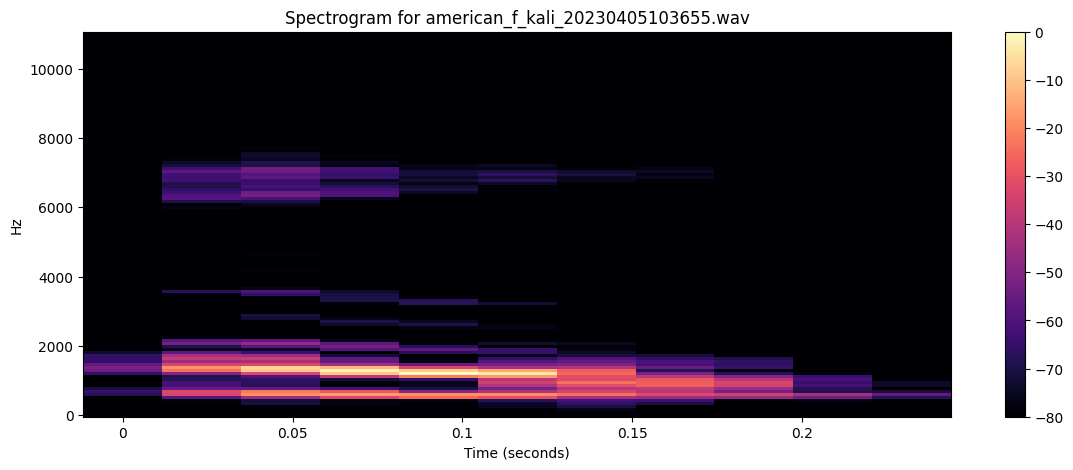

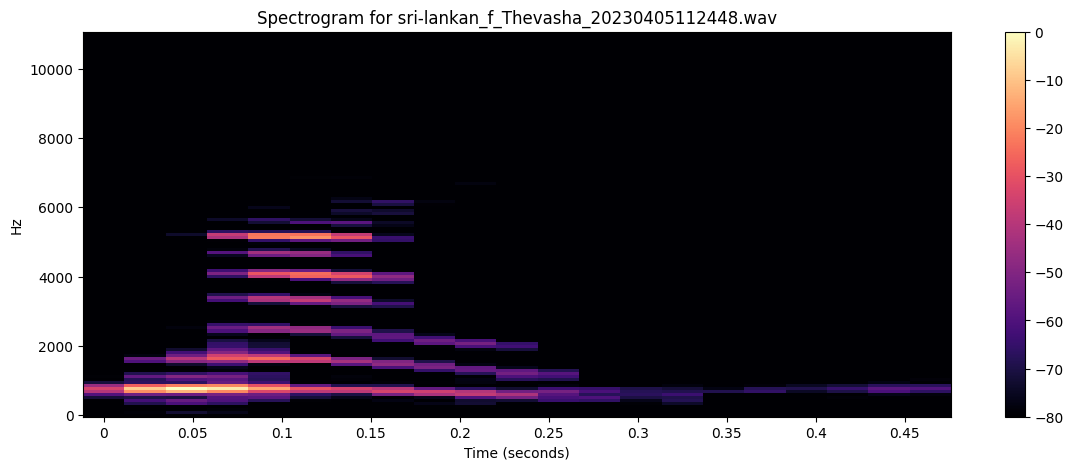

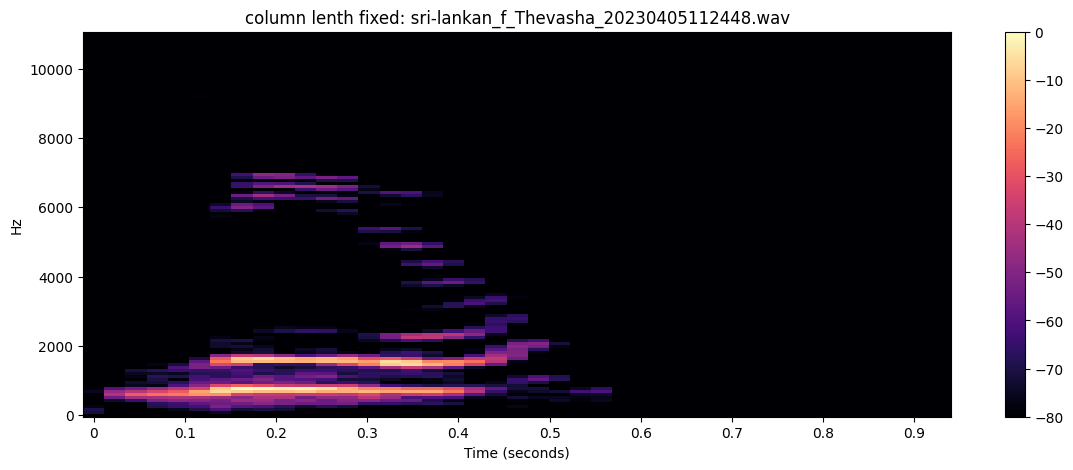

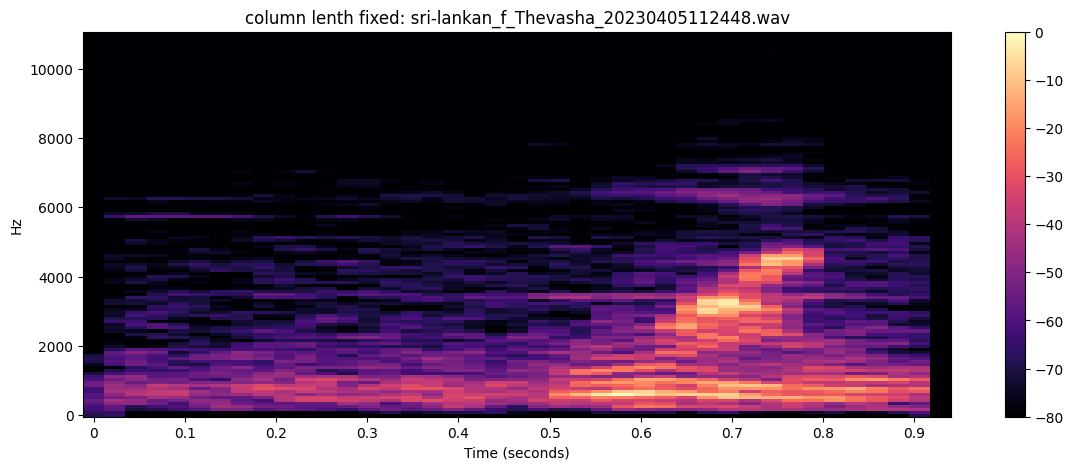

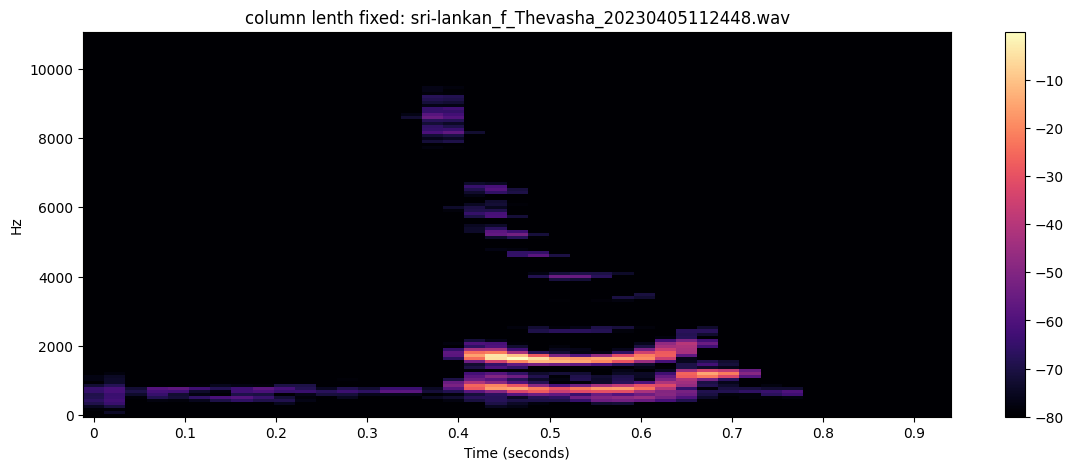

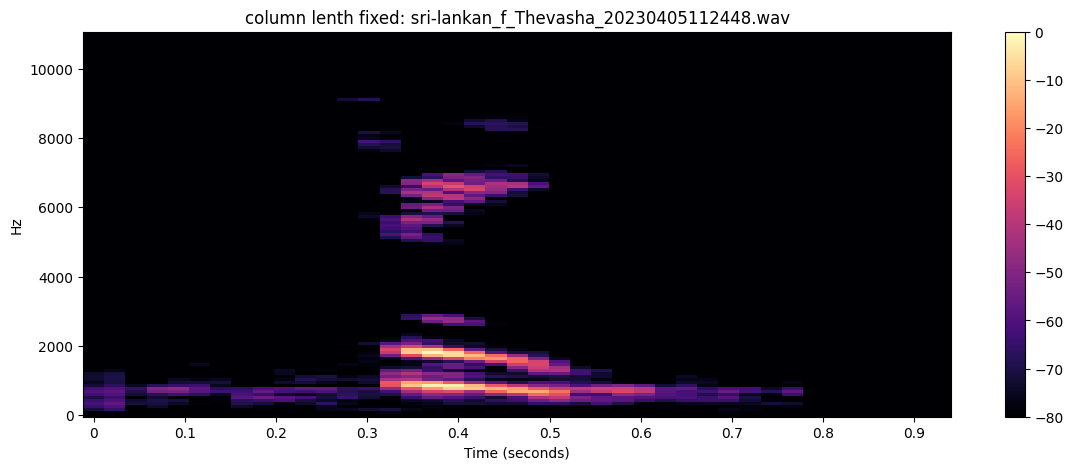

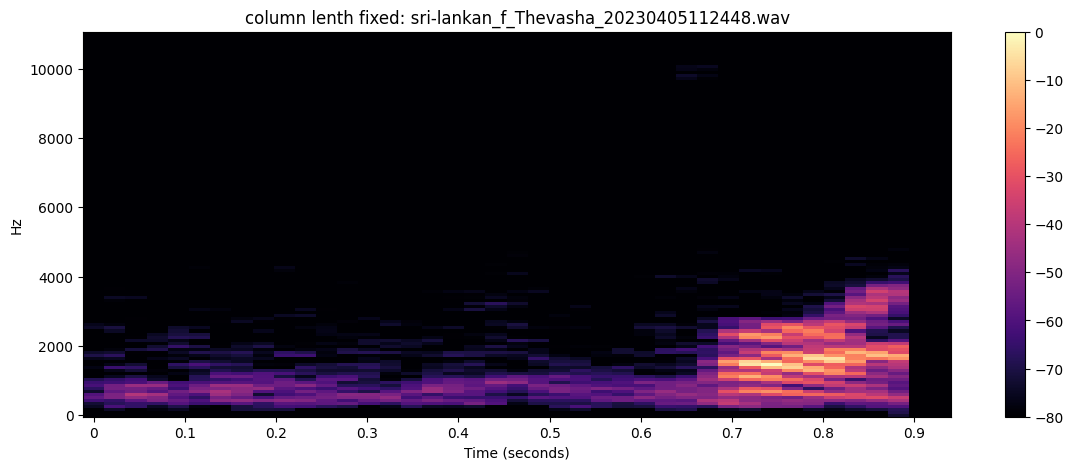

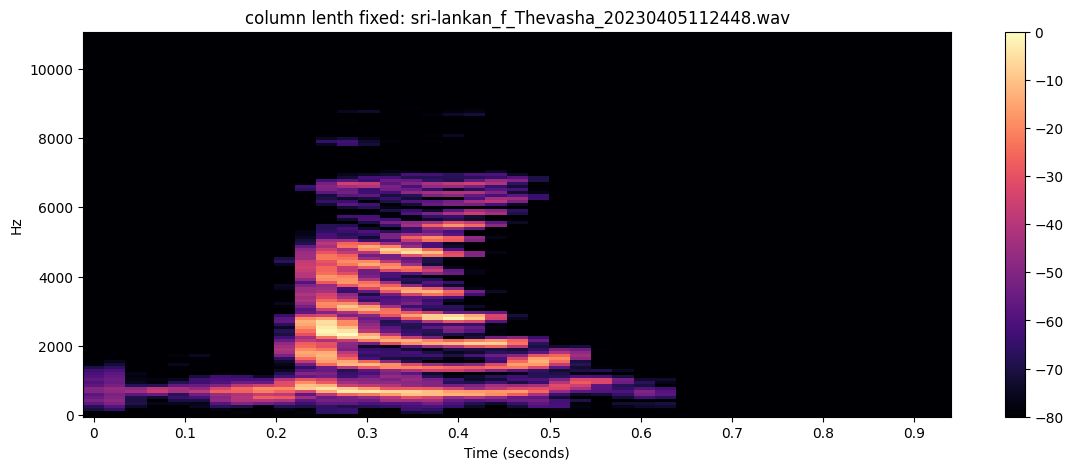

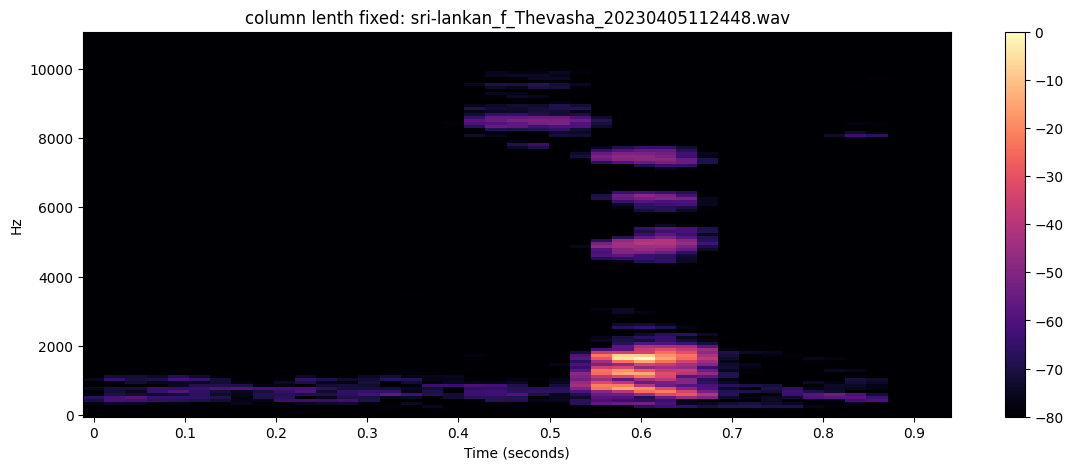

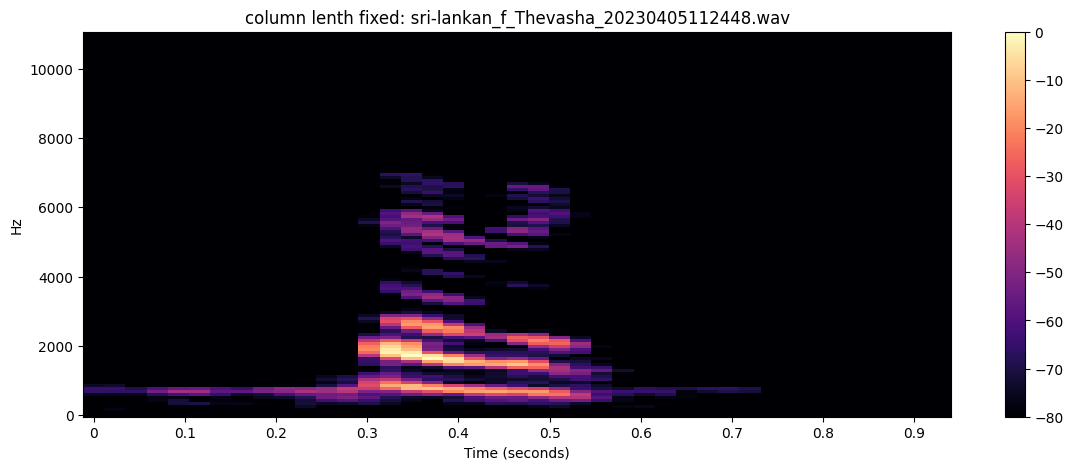

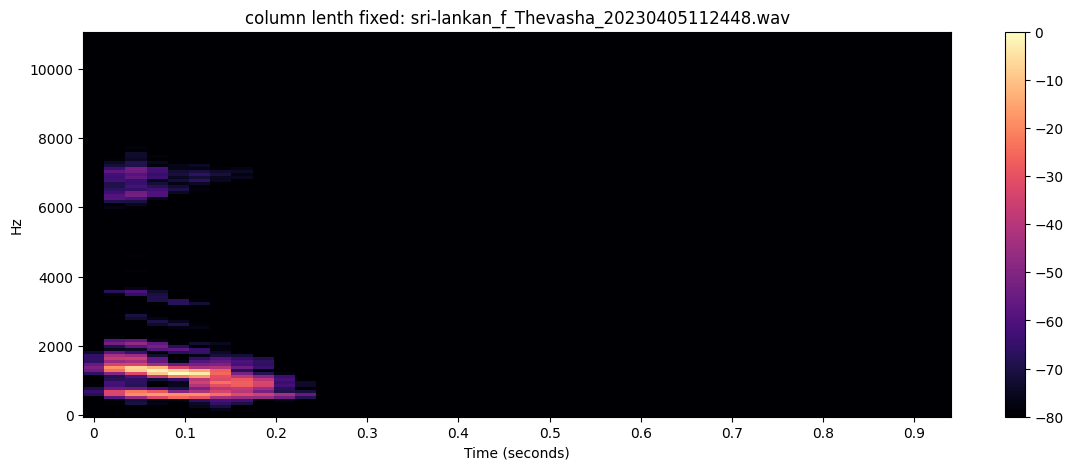

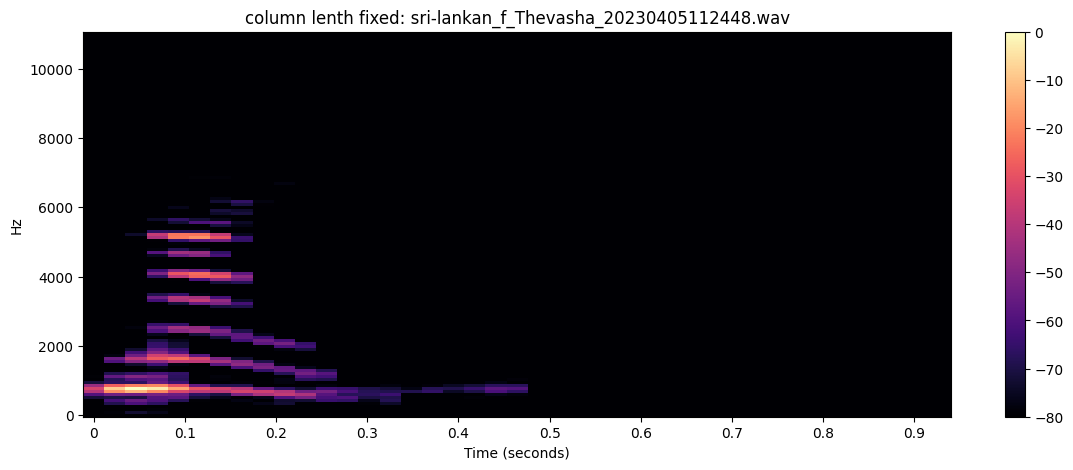

In [4]:
spectrograms_dictionary = {}
waveforms_dictionary = {}
mel_spectrogram_dictionary= {}
mel_spectrogram_crop_dictionary= {}



path = "./audio/"

for j in range(10):
    c=0
    spectrograms = []
    waveforms = []
    mel_spectrogram = []
    mel_spectrogram_crop =[]

    dir_list = os.listdir(f"{path}{j}/")
    
    
    for i,file_name in enumerate(dir_list):

        y, sr = librosa.load(f"{path}{j}/{file_name}")
        waveforms.append(y)

        spectrogram = librosa.stft(y)
        spectrograms.append(spectrogram)

        S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
        s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
        mel_spectrogram.append(s_db_mel)

        mask = s_db_mel.max(axis=0) >-70 #np.min(stats.mode(s_db_mel))
        filtered_arr = s_db_mel[:, mask]
        mel_spectrogram_crop.append(filtered_arr)
        
        if c==0:
            plt.figure(figsize=(14,5))
            img=librosa.display.specshow(filtered_arr,sr=sr,x_axis='s',y_axis='linear')
            plt.title(f'Spectrogram for {dir_list[i]}')
            plt.colorbar()
            c=1

    
    spectrograms_dictionary[j] = spectrograms
    
    waveforms_dictionary[j] = waveforms
    mel_spectrogram_dictionary[j]= mel_spectrogram
    mel_spectrogram_crop_dictionary[j]=mel_spectrogram_crop

#setup the same dimension size to the all croped mel spectrograms

#maximum number of columns among all arrays
max_cols = max([arr.shape[1] for num, mel_spectrogram_crop in mel_spectrogram_crop_dictionary.items() for arr in mel_spectrogram_crop])

# resize each array to have the same number of columns
for num, mel_spectrogram_crop in mel_spectrogram_crop_dictionary.items():
    c=0
    for i in range(len(mel_spectrogram_crop)):
        new_arr = np.full((mel_spectrogram_crop[i].shape[0], max_cols), mel_spectrogram_crop[i].min())
        new_arr[:,:mel_spectrogram_crop[i].shape[1]]= mel_spectrogram_crop[i]
        mel_spectrogram_crop[i] = new_arr

        if c==0:
            plt.figure(figsize=(14,5))
            img=librosa.display.specshow(new_arr,sr=sr,x_axis='s',y_axis='linear')
            plt.title(f'column lenth fixed: {dir_list[i]}')
            plt.colorbar()
            c=1
        
    mel_spectrogram_crop_dictionary.update({num : mel_spectrogram_crop})

    



In [5]:
# Writing all the data to pickle files
import pickle


file_names = ['waveforms', 'spectrograms', 'mel_spectrograms', 'mel_spectrogram_crop']
data_dictionaries = [waveforms_dictionary, spectrograms_dictionary, mel_spectrogram_dictionary, mel_spectrogram_crop_dictionary]

for i in range(len(file_names)):

    # Open a file for writing
    with open(f"./data/{file_names[i]}.pickle", "wb") as f:
        # Write the dictionary data to the file as JSON
        pickle.dump(data_dictionaries[i], f)

    print("Dictionary data written to file successfully")


Dictionary data written to file successfully
Dictionary data written to file successfully
Dictionary data written to file successfully
Dictionary data written to file successfully
